In [5]:
%matplotlib inline

import pandas as pd
import geopandas # as gpd
import geoplot # as gplt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from functools import reduce
from datetime import datetime

from shapely.geometry import Point
import matplotlib.pyplot as plt
import mapclassify as mc
import matplotlib.colors as colors



In [6]:
x2019 = pd.read_csv('20196m_arrests.csv', header=0, names=["objectid", 2019]).sort_values('objectid', ascending=True)
x2020 = pd.read_csv('20206m_arrests.csv', header=0, names=["objectid", 2020]).sort_values('objectid', ascending=True)

years = [x2019, x2020]
    
# turnstile = pd.merge(x, right=True)

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['objectid'], how='outer'), years).fillna(0)

In [7]:
df_merged

objectid  2019  2020
0         3.0   5.0   0.0
1         4.0   2.0   0.0
2         5.0   1.0   0.0
3         8.0   3.0   4.0
4        12.0   3.0   2.0
..        ...   ...   ...
252     341.0   0.0   1.0
253     402.0   0.0   6.0
254     458.0   0.0   2.0
255     466.0   0.0   1.0
256     643.0   0.0   2.0

[257 rows x 3 columns]

In [138]:
df_merged[2019].sum()

1427.0

In [139]:
df_merged[2020].sum()

525.0

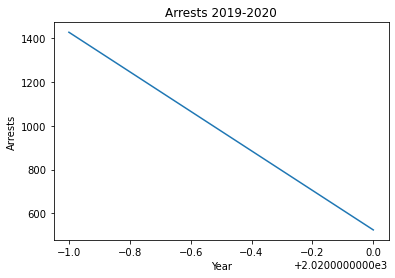

<Figure size 432x288 with 0 Axes>

In [8]:
years_sum = df_merged.set_index('objectid').sum()
plt.plot(years_sum)
plt.xticks()
plt.title('Arrests 2019-2020')
plt.ylabel('Arrests')
plt.xlabel('Year')
plt.show()

plt.savefig('Arrests_per_year.png')

In [9]:
years_sum

2019    1427.0
2020     525.0
dtype: float64

In [10]:
years = [2019, 2020]
entries = []
for year in years:
    entries.append(pd.read_csv(f'{year}6m_entries.csv', parse_dates=['DATE']))
    
turnstile = pd.concat(entries)
turnstile = turnstile.drop('Unnamed: 0', axis=1)
turnstile['YEAR'] = turnstile['DATE'].dt.year

In [11]:
turnstile

objectid       DATE  DAILY_ENTRIES STATION_LINENAME  YEAR
0           1.0 2019-06-30        11885.0        ASTOR PL6  2019
1           1.0 2019-07-01        15344.0        ASTOR PL6  2019
2           1.0 2019-07-02        15610.0        ASTOR PL6  2019
3           1.0 2019-07-03        16549.0        ASTOR PL6  2019
4           1.0 2019-07-04        15658.0        ASTOR PL6  2019
...         ...        ...            ...              ...   ...
85039     643.0 2020-06-26         3674.0     96 ST-2 AVEQ  2020
85040     643.0 2019-12-28      1480222.0     96 ST-2 AVEQ  2019
85041     643.0 2019-12-29         9975.0     96 ST-2 AVEQ  2019
85042     643.0 2019-12-30         7641.0     96 ST-2 AVEQ  2019
85043     643.0 2019-12-31        13742.0     96 ST-2 AVEQ  2019

[169895 rows x 5 columns]

In [12]:
turnstile.sort_values(by='DAILY_ENTRIES', ascending = False).reset_index()

index  objectid       DATE  DAILY_ENTRIES  \
0       36911     204.0 2019-12-28      9827880.0   
1        5607      31.0 2019-12-28      9827880.0   
2       14650      81.0 2019-12-28      9827880.0   
3       78524     437.0 2019-12-28      9347188.0   
4       65320     362.0 2019-12-28      8391069.0   
...       ...       ...        ...            ...   
169890  54687     305.0 2019-08-04            0.0   
169891  54681     305.0 2019-07-29            0.0   
169892  54680     305.0 2019-07-28            0.0   
169893  54569     304.0 2019-10-06            0.0   
169894  60924     339.0 2019-11-03            0.0   

                   STATION_LINENAME  YEAR  
0              GRD CNTRL-42 ST4567S  2019  
1              GRD CNTRL-42 ST4567S  2019  
2              GRD CNTRL-42 ST4567S  2019  
3              34 ST-PENN STA123ACE  2019  
4       42 ST-PORT AUTHACENGRS1237W  2019  
...                             ...   ...  
169890                JEFFERSON STL  2019  
169891                JEFFERSON STL  2019  
169892                JEFFERSON STL  2019  
169893                     30 AVNQW  2019  
169894                    BAY PKWYF  2019  

[169895 rows x 6 columns]

In [13]:
turnstile.sort_values(by='DAILY_ENTRIES').iloc[:10]

objectid       DATE  DAILY_ENTRIES  STATION_LINENAME  YEAR
23722     132.0 2019-07-15            0.0      NEWKIRK AV25  2019
82409     460.0 2019-09-30            0.0            88 STA  2019
82408     460.0 2019-09-29            0.0            88 STA  2019
61764     343.0 2020-03-02            0.0        AVENUE JBQ  2020
81490     455.0 2019-09-16            0.0    PRESIDENT ST25  2019
22402     124.0 2020-05-28            0.0  AQUEDUCT RACETRA  2020
20043     111.0 2019-11-11            0.0   BEVERLEY ROADBQ  2019
20050     111.0 2019-11-18            0.0   BEVERLEY ROADBQ  2019
81441     455.0 2019-07-29            0.0    PRESIDENT ST25  2019
61923     344.0 2020-02-09            0.0        AVENUE HBQ  2020

# Maps

## shapefiles to GeoJson

In [14]:
geoStations = geopandas.read_file('Data/geo/geo_export_d1cef8bd-bb80-491b-983e-fc4b3e3aab4f.shp')
geoStations.to_file("Data/geo/geoStations.geojson", driver = "GeoJSON")
with open("Data/geo/geoStations.geojson") as geoJson:
    geoStations = json.load(geoJson)
geoStations.keys()

dict_keys(['type', 'crs', 'features'])

In [15]:
stations = geopandas.read_file('Data/geo/geo_export_d1cef8bd-bb80-491b-983e-fc4b3e3aab4f.shp')
stations

line                         name  \
0    4-6-6 Express                     Astor Pl   
1    4-6-6 Express                     Canal St   
2              1-2                      50th St   
3            2-3-4                    Bergen St   
4              3-4             Pennsylvania Ave   
..             ...                          ...   
468        D-F-N-Q  Coney Island - Stillwell Av   
469    7-7 Express       34th St - Hudson Yards   
470              Q                      72nd St   
471              Q                      86th St   
472              Q                      96th St   

                                                 notes  objectid  \
0    4 nights, 6-all times, 6 Express-weekdays AM s...       1.0   
1    4 nights, 6-all times, 6 Express-weekdays AM s...       2.0   
2                                1-all times, 2-nights       3.0   
3             4-nights, 3-all other times, 2-all times       4.0   
4                          4-nights, 3-all other times       5.0   
..                                                 ...       ...   
468                                  D,F,N,Q-all times     469.0   
469  7-all times, 7 Express-rush hours AM westbound...     470.0   
470                                        Q-all times     641.0   
471                                        Q-all times     642.0   
472                                        Q-all times     643.0   

                                   url                    geometry  
0    http://web.mta.info/nyct/service/  POINT (-73.99107 40.73005)  
1    http://web.mta.info/nyct/service/  POINT (-74.00019 40.71880)  
2    http://web.mta.info/nyct/service/  POINT (-73.98385 40.76173)  
3    http://web.mta.info/nyct/service/  POINT (-73.97500 40.68086)  
4    http://web.mta.info/nyct/service/  POINT (-73.89489 40.66471)  
..                                 ...                         ...  
468  http://web.mta.info/nyct/service/  POINT (-73.98124 40.57728)  
469  http://web.mta.info/nyct/service/  POINT (-74.00220 40.75545)  
470  http://web.mta.info/nyct/service/  POINT (-73.95836 40.76880)  
471  http://web.mta.info/nyct/service/  POINT (-73.95177 40.77786)  
472  http://web.mta.info/nyct/service/  POINT (-73.94707 40.78424)  

[473 rows x 6 columns]

In [16]:
borough_bound = geopandas.read_file('Data/Borough Boundaries/geo_export_41525217-5b67-4551-bc27-812c6d74e598.shp')
borough_bound['boro_code']

0    2.0
1    5.0
2    3.0
3    4.0
4    1.0
Name: boro_code, dtype: float64

In [17]:
geoBorough = geopandas.read_file('Data/Borough Boundaries/geo_export_41525217-5b67-4551-bc27-812c6d74e598.shp')
geoBorough.to_file("Data/geo/geoBorough.geojson", driver = "GeoJSON")
with open("Data/geo/geoBorough.geojson") as geoJson:
    geoBorough = json.load(geoJson)
geoBorough

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'boro_code': 2.0,
    'boro_name': 'Bronx',
    'shape_area': 1186612476.77,
    'shape_leng': 462958.188213},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.89680883223774, 40.79580844515979],
       [-73.89693872998792, 40.79563587285357],
       [-73.89723603843939, 40.79572003753707],
       [-73.89796839783742, 40.795644839161994],
       [-73.89857332665558, 40.7960691402596],
       [-73.89895261766395, 40.79622785257905],
       [-73.89919434249981, 40.79650245601821],
       [-73.89852052071471, 40.796936194189776],
       [-73.89788253240185, 40.79711653214705],
       [-73.89713149795642, 40.79679807772831],
       [-73.89678526341234, 40.796329166487105],
       [-73.89680883223774, 40.79580844515979]]],
     [[[-73.88885148496334, 40.798706328958765],
       [-73.88860021869873, 40.7986509

In [18]:
subway_lines = geopandas.read_file('Data/Subway Lines/geo_export_0bf20305-3c1e-4a7b-b2c2-36e2d97e538a.shp')
subway_lines

id name  objectid rt_symbol    shape_len  \
0    2000393.0    G     753.0         G  2438.200249   
1    2000394.0    G     754.0         G  3872.834411   
2    2000469.0    Q     755.0         N  1843.366331   
3    2000294.0    M     756.0         B  1919.559203   
4    2000296.0    M     757.0         B  2385.698536   
..         ...  ...       ...       ...          ...   
737        0.0    M    1490.0         B  4198.262641   
738        0.0    Q    1718.0         N  3779.620046   
739        0.0    Q    1873.0         N  2797.021390   
740        0.0  N-W    1809.0         N  2194.718931   
741        0.0    Q    1777.0         N   845.118169   

                                   url  \
0    http://web.mta.info/nyct/service/   
1    http://web.mta.info/nyct/service/   
2    http://web.mta.info/nyct/service/   
3    http://web.mta.info/nyct/service/   
4    http://web.mta.info/nyct/service/   
..                                 ...   
737  http://web.mta.info/nyct/service/   
738  http://web.mta.info/nyct/service/   
739  http://web.mta.info/nyct/service/   
740  http://web.mta.info/nyct/service/   
741  http://web.mta.info/nyct/service/   

                                              geometry  
0    LINESTRING (-73.99488 40.68020, -73.99427 40.6...  
1    LINESTRING (-73.97958 40.65993, -73.97966 40.6...  
2    LINESTRING (-73.97586 40.57597, -73.97654 40.5...  
3    LINESTRING (-73.92414 40.75229, -73.92405 40.7...  
4    LINESTRING (-73.91345 40.75617, -73.90905 40.7...  
..                                                 ...  
737  LINESTRING (-73.94113 40.70035, -73.94217 40.7...  
738  LINESTRING (-73.95836 40.76880, -73.95787 40.7...  
739  LINESTRING (-73.97950 40.76625, -73.97865 40.7...  
740  LINESTRING (-73.94014 40.75069, -73.93989 40.7...  
741  LINESTRING (-73.96465 40.76420, -73.96452 40.7...  

[742 rows x 7 columns]

In [19]:
arrests = pd.read_csv('Arrests_Assigned_250m222.csv', parse_dates=['ARREST_DATE'])
arrests = arrests.drop('Unnamed: 0', axis=1)


# arrests.loc['2019-6-30':'2020-6-30']
arrests = arrests[arrests['ARREST_DATE'] >= datetime(2019,6,30) ]
arrests = arrests[arrests['ARREST_DATE'] <= datetime(2020,6,26)]
arrests['YEAR'] = arrests['ARREST_DATE'].dt.year
arrests

ARREST_KEY ARREST_DATE ARREST_BORO  ARREST_PRECINCT  \
4        201664879  2019-08-28           K               83   
14       203133786  2019-10-01           B               44   
18       200024091  2019-07-21           K               73   
22       200331236  2019-07-28           M               18   
39       204137894  2019-10-24           M               23   
...            ...         ...         ...              ...   
272098   209427795  2020-02-12           K               88   
272099   206916294  2020-01-03           M               18   
272100   206907038  2020-01-02           K               60   
272101   207466526  2020-01-06           K               67   
272102   206903454  2020-01-02           Q              110   

        JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE   Latitude  \
4                       0     25-44        M  BLACK HISPANIC  40.702480   
14                      0     18-24        M           BLACK  40.840234   
18                      1       <18        M           BLACK  40.668280   
22                      1     45-64        M           BLACK  40.768899   
39                      0     25-44        M  WHITE HISPANIC  40.795130   
...                   ...       ...      ...             ...        ...   
272098                  1     25-44        M           BLACK  40.688911   
272099                  1     25-44        M           BLACK  40.768899   
272100                  1     18-24        M           BLACK  40.576646   
272101                  1     18-24        M           BLACK  40.650815   
272102                  1     25-44        M           BLACK  40.733547   

        Longitude                          geometry   index           line  \
4      -73.920451  POINT (-73.92045095 40.70248032)       6              L   
14     -73.917684  POINT (-73.91768411 40.84023414)      17              4   
18     -73.902627  POINT (-73.90262665 40.66828047)      23              L   
22     -73.982095  POINT (-73.98209494 40.76889926)      29            1-2   
39     -73.944180  POINT (-73.94418046 40.79512955)      47  4-6-6 Express   
...           ...                               ...     ...            ...   
272098 -73.980930  POINT (-73.98093009 40.68891139)  296468        2-3-4-5   
272099 -73.982095  POINT (-73.98209494 40.76889926)  296469            1-2   
272100 -73.976480   POINT (-73.9764804 40.57664598)  296470            F-Q   
272101 -73.949574  POINT (-73.94957355 40.65081539)  296471            2-5   
272102 -73.870349   POINT (-73.8703491 40.73354668)  296472          E-M-R   

                                name  \
4                         DeKalb Ave   
14                          170th St   
18                        Sutter Ave   
22         59th St - Columbus Circle   
39                          110th St   
...                              ...   
272098                     Nevins St   
272099     59th St - Columbus Circle   
272100        W 8th St - NY Aquarium   
272101                    Church Ave   
272102  Woodhaven Blvd - Queens Mall   

                                                    notes  objectid  YEAR  
4                                             L-all times     235.0  2019  
14                                            4-all times     264.0  2019  
18                                            L-all times      73.0  2019  
22                                  1-all times, 2-nights      94.0  2019  
39      4 nights, 6-all times, 6 Express-weekdays AM s...     450.0  2019  
...                                                   ...       ...   ...  
272098  2,4-all times, 3-all times exc nights, 5-weekdays     128.0  2020  
272099                              1-all times, 2-nights      94.0  2020  
272100                                      F,Q-all times     198.0  2020  
272101                            2-all times, 5-weekdays     131.0  2020  
272102  E-nights, R-all other times, M-weekdays and ev...     232.0  2020  

[1705 rows x 17 col

In [20]:
stations = geopandas.read_file('Data/geo/geo_export_d1cef8bd-bb80-491b-983e-fc4b3e3aab4f.shp')
stations = stations.set_index('objectid')
stations['usage'] = turnstile.groupby('objectid')['DAILY_ENTRIES'].agg('sum')
stations['arrests'] = arrests.groupby('objectid').count().ARREST_KEY
stations['arrests'] = stations['arrests'].fillna(0)
#stations[['geometry','usage','arrests']]
stations

line                         name  \
objectid                                               
1.0       4-6-6 Express                     Astor Pl   
2.0       4-6-6 Express                     Canal St   
3.0                 1-2                      50th St   
4.0               2-3-4                    Bergen St   
5.0                 3-4             Pennsylvania Ave   
...                 ...                          ...   
469.0           D-F-N-Q  Coney Island - Stillwell Av   
470.0       7-7 Express       34th St - Hudson Yards   
641.0                 Q                      72nd St   
642.0                 Q                      86th St   
643.0                 Q                      96th St   

                                                      notes  \
objectid                                                      
1.0       4 nights, 6-all times, 6 Express-weekdays AM s...   
2.0       4 nights, 6-all times, 6 Express-weekdays AM s...   
3.0                                   1-all times, 2-nights   
4.0                4-nights, 3-all other times, 2-all times   
5.0                             4-nights, 3-all other times   
...                                                     ...   
469.0                                     D,F,N,Q-all times   
470.0     7-all times, 7 Express-rush hours AM westbound...   
641.0                                           Q-all times   
642.0                                           Q-all times   
643.0                                           Q-all times   

                                        url                    geometry  \
objectid                                                                  
1.0       http://web.mta.info/nyct/service/  POINT (-73.99107 40.73005)   
2.0       http://web.mta.info/nyct/service/  POINT (-74.00019 40.71880)   
3.0       http://web.mta.info/nyct/service/  POINT (-73.98385 40.76173)   
4.0       http://web.mta.info/nyct/service/  POINT (-73.97500 40.68086)   
5.0       http://web.mta.info/nyct/service/  POINT (-73.89489 40.66471)   
...                                     ...                         ...   
469.0     http://web.mta.info/nyct/service/  POINT (-73.98124 40.57728)   
470.0     http://web.mta.info/nyct/service/  POINT (-74.00220 40.75545)   
641.0     http://web.mta.info/nyct/service/  POINT (-73.95836 40.76880)   
642.0     http://web.mta.info/nyct/service/  POINT (-73.95177 40.77786)   
643.0     http://web.mta.info/nyct/service/  POINT (-73.94707 40.78424)   

               usage  arrests  
objectid                       
1.0        5290897.0      0.0  
2.0       16800729.0      0.0  
3.0        7187457.0      5.0  
4.0        1220961.0      2.0  
5.0        1473927.0      1.0  
...              ...      ...  
469.0      5105029.0     31.0  
470.0      6050143.0      0.0  
641.0      9282117.0      0.0  
642.0      7892074.0      0.0  
643.0      6006888.0      2.0  

[473 rows x 7 columns]

In [49]:
st = stations.sort_values(by='arrests', ascending = False).head(10).reset_index()
st

objectid     line                               name  \
0      65.0    E-J-Z           Sutphin Blvd - Archer Av   
1      73.0        L                         Sutter Ave   
2     127.0      A-C                       Nostrand Ave   
3     362.0    A-C-E  42nd St - Port Authority Bus Term   
4     368.0    A-C-F                 Jay St - MetroTech   
5     386.0      A-C                  Broadway Junction   
6     116.0  2-3-4-5     Atlantic Av - Barclay's Center   
7     135.0      3-4              Crown Hts - Utica Ave   
8     171.0      B-D                        Tremont Ave   
9     298.0      A-C                          Utica Ave   

                                               notes  \
0  E,J-all times, Z-rush hours AM westbound, PM e...   
1                                        L-all times   
2                A-all times, C-all times exc nights   
3              A,E-all times, C-all times exc nights   
4              A,F-all times, C-all times exc nights   
5                A-all times, C-all times exc nights   
6  2,4-all times, 3-all times exc nights, 5-weekdays   
7                3-all times exc nights, 4-all times   
8                          B-rush hours, D-all times   
9                A-all times, C-all times exc nights   

                                 url                    geometry       usage  \
0  http://web.mta.info/nyct/service/  POINT (-73.80800 40.70038)   7593835.0   
1  http://web.mta.info/nyct/service/  POINT (-73.90192 40.66915)   1106699.0   
2  http://web.mta.info/nyct/service/  POINT (-73.95043 40.68044)   5512105.0   
3  http://web.mta.info/nyct/service/  POINT (-73.98974 40.75731)  33632922.0   
4  http://web.mta.info/nyct/service/  POINT (-73.98722 40.69247)  11893392.0   
5  http://web.mta.info/nyct/service/  POINT (-73.90532 40.67833)   2960962.0   
6  http://web.mta.info/nyct/service/  POINT (-73.97755 40.68442)  13837119.0   
7  http://web.mta.info/nyct/service/  POINT (-73.93293 40.66898)   8385537.0   
8  http://web.mta.info/nyct/service/  POINT (-73.90523 40.85041)   3185297.0   
9  http://web.mta.info/nyct/service/  POINT (-73.93073 40.67936)   5137165.0   

   arrests  
0     97.0  
1     54.0  
2     52.0  
3     47.0  
4     43.0  
5     39.0  
6     37.0  
7     37.0  
8     34.0  
9     33.0

In [50]:
ar2019 = df_merged.set_index('objectid')
y = stations.reset_index()
ar2019 = ar2019.merge(y[['objectid','name']], on='objectid', how='outer').fillna(0)
y2019 = ar2019.groupby('name')[2019].sum().reset_index().sort_values(by=2019, ascending=False)[:10]
y2019

name  2019
326           Sutphin Blvd - Archer Av  70.0
114     Atlantic Av - Barclay's Center  64.0
63   42nd St - Port Authority Bus Term  60.0
54              34th St - Penn Station  50.0
292                       Nostrand Ave  43.0
241         Jackson Hts - Roosevelt Av  42.0
245                 Jay St - MetroTech  36.0
90                  74th St - Broadway  33.0
330                        Tremont Ave  31.0
327                         Sutter Ave  30.0

In [181]:
y2020 = ar2019.groupby('name')[2020].sum().reset_index().sort_values(by=2020, ascending=False)[:10]
y2020

name  2020
63   42nd St - Port Authority Bus Term  34.0
326           Sutphin Blvd - Archer Av  26.0
327                         Sutter Ave  24.0
114     Atlantic Av - Barclay's Center  24.0
54              34th St - Penn Station  22.0
292                       Nostrand Ave  15.0
154                  Broadway Junction  15.0
187              Crown Hts - Utica Ave  14.0
47                             23rd St  11.0
9                             125th St  11.0

In [182]:
y2020.name.to_list()

['42nd St - Port Authority Bus Term',
 'Sutphin Blvd - Archer Av',
 'Sutter Ave',
 "Atlantic Av - Barclay's Center",
 '34th St - Penn Station',
 'Nostrand Ave',
 'Broadway Junction',
 'Crown Hts - Utica Ave',
 '23rd St',
 '125th St']

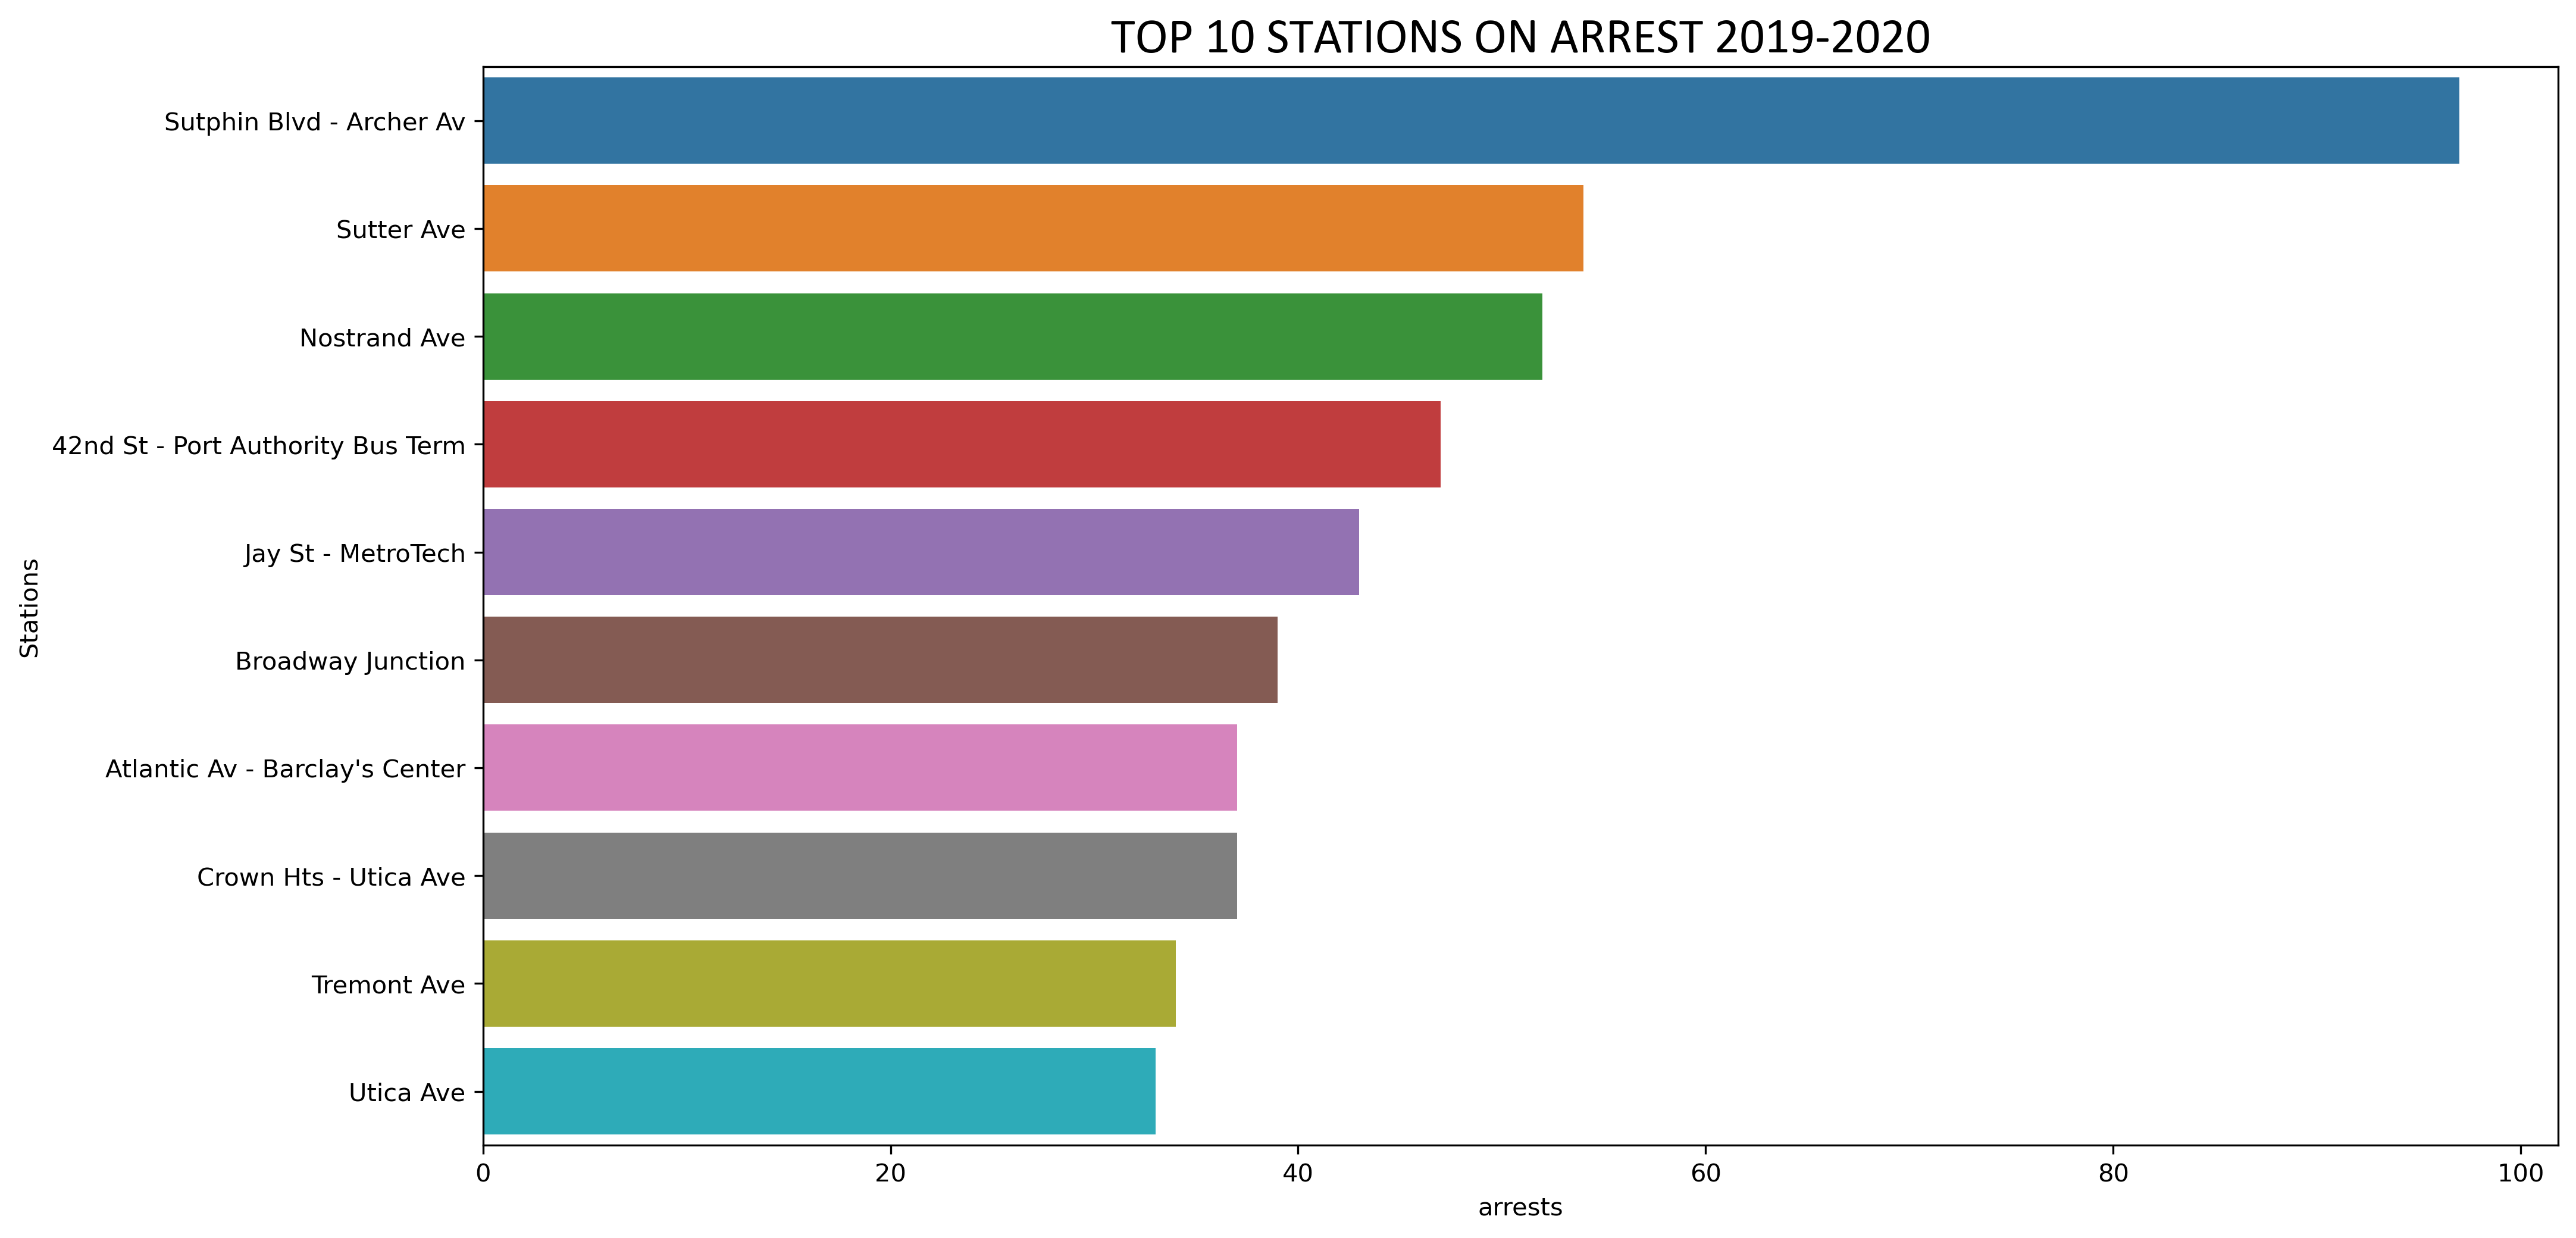

<Figure size 432x288 with 0 Axes>

In [171]:
plt.figure(figsize=(15,8), dpi=300)
plt.title('TOP 10 STATIONS ON ARREST 2019-2020',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.barplot(data = st, y = st['name'], x = st['arrests'])
plt.ylabel('Stations')
plt.show()
plt.savefig('TOP 10 STATIONS ON ARREST 2019-2020.jpg',  bbox_inches='tight')

In [25]:
usage10 = turnstile.groupby(['STATION_LINENAME','YEAR']).agg({'DAILY_ENTRIES':'sum'}).reset_index()
usage1019 = usage10[usage10.YEAR == 2019].sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
usage1019 = usage1019[:10]
usage1019

index           STATION_LINENAME  YEAR  DAILY_ENTRIES
0    591       GRD CNTRL-42 ST4567S  2019    111993507.0
1    824  TIMES SQ-42 ST1237ACENQRS  2019     94914416.0
2    573          FULTON ST2345ACJZ  2019     82753248.0
3     48     14 ST-UNION SQ456LNQRW  2019     69490077.0
4    171    34 ST-HERALD SQBDFMNQRW  2019     57472930.0
5    445            CANAL STJNQRZ6W  2019     39417942.0
6    229        59 ST COLUMBUS1ABCD  2019     36986196.0
7    331    ATL AV-BARCLAY2345BDNQR  2019     31085796.0
8    177       34 ST-PENN STA123ACE  2019     30345085.0
9    265        74 ST-BROADWAY7EFMR  2019     28283126.0

In [26]:
usage1020 = usage10[usage10.YEAR == 2020].sort_values(by='DAILY_ENTRIES', ascending=False).reset_index()
usage1020 = usage1020[:10]
usage1020

index           STATION_LINENAME  YEAR  DAILY_ENTRIES
0    825  TIMES SQ-42 ST1237ACENQRS  2020     29219264.0
1    592       GRD CNTRL-42 ST4567S  2020     28653624.0
2    574          FULTON ST2345ACJZ  2020     24885808.0
3     49     14 ST-UNION SQ456LNQRW  2020     20019702.0
4    172    34 ST-HERALD SQBDFMNQRW  2020     16232680.0
5    446            CANAL STJNQRZ6W  2020     10984245.0
6    332    ATL AV-BARCLAY2345BDNQR  2020     10425561.0
7    178       34 ST-PENN STA123ACE  2020      9732353.0
8    230        59 ST COLUMBUS1ABCD  2020      9543504.0
9    266        74 ST-BROADWAY7EFMR  2020      8733378.0

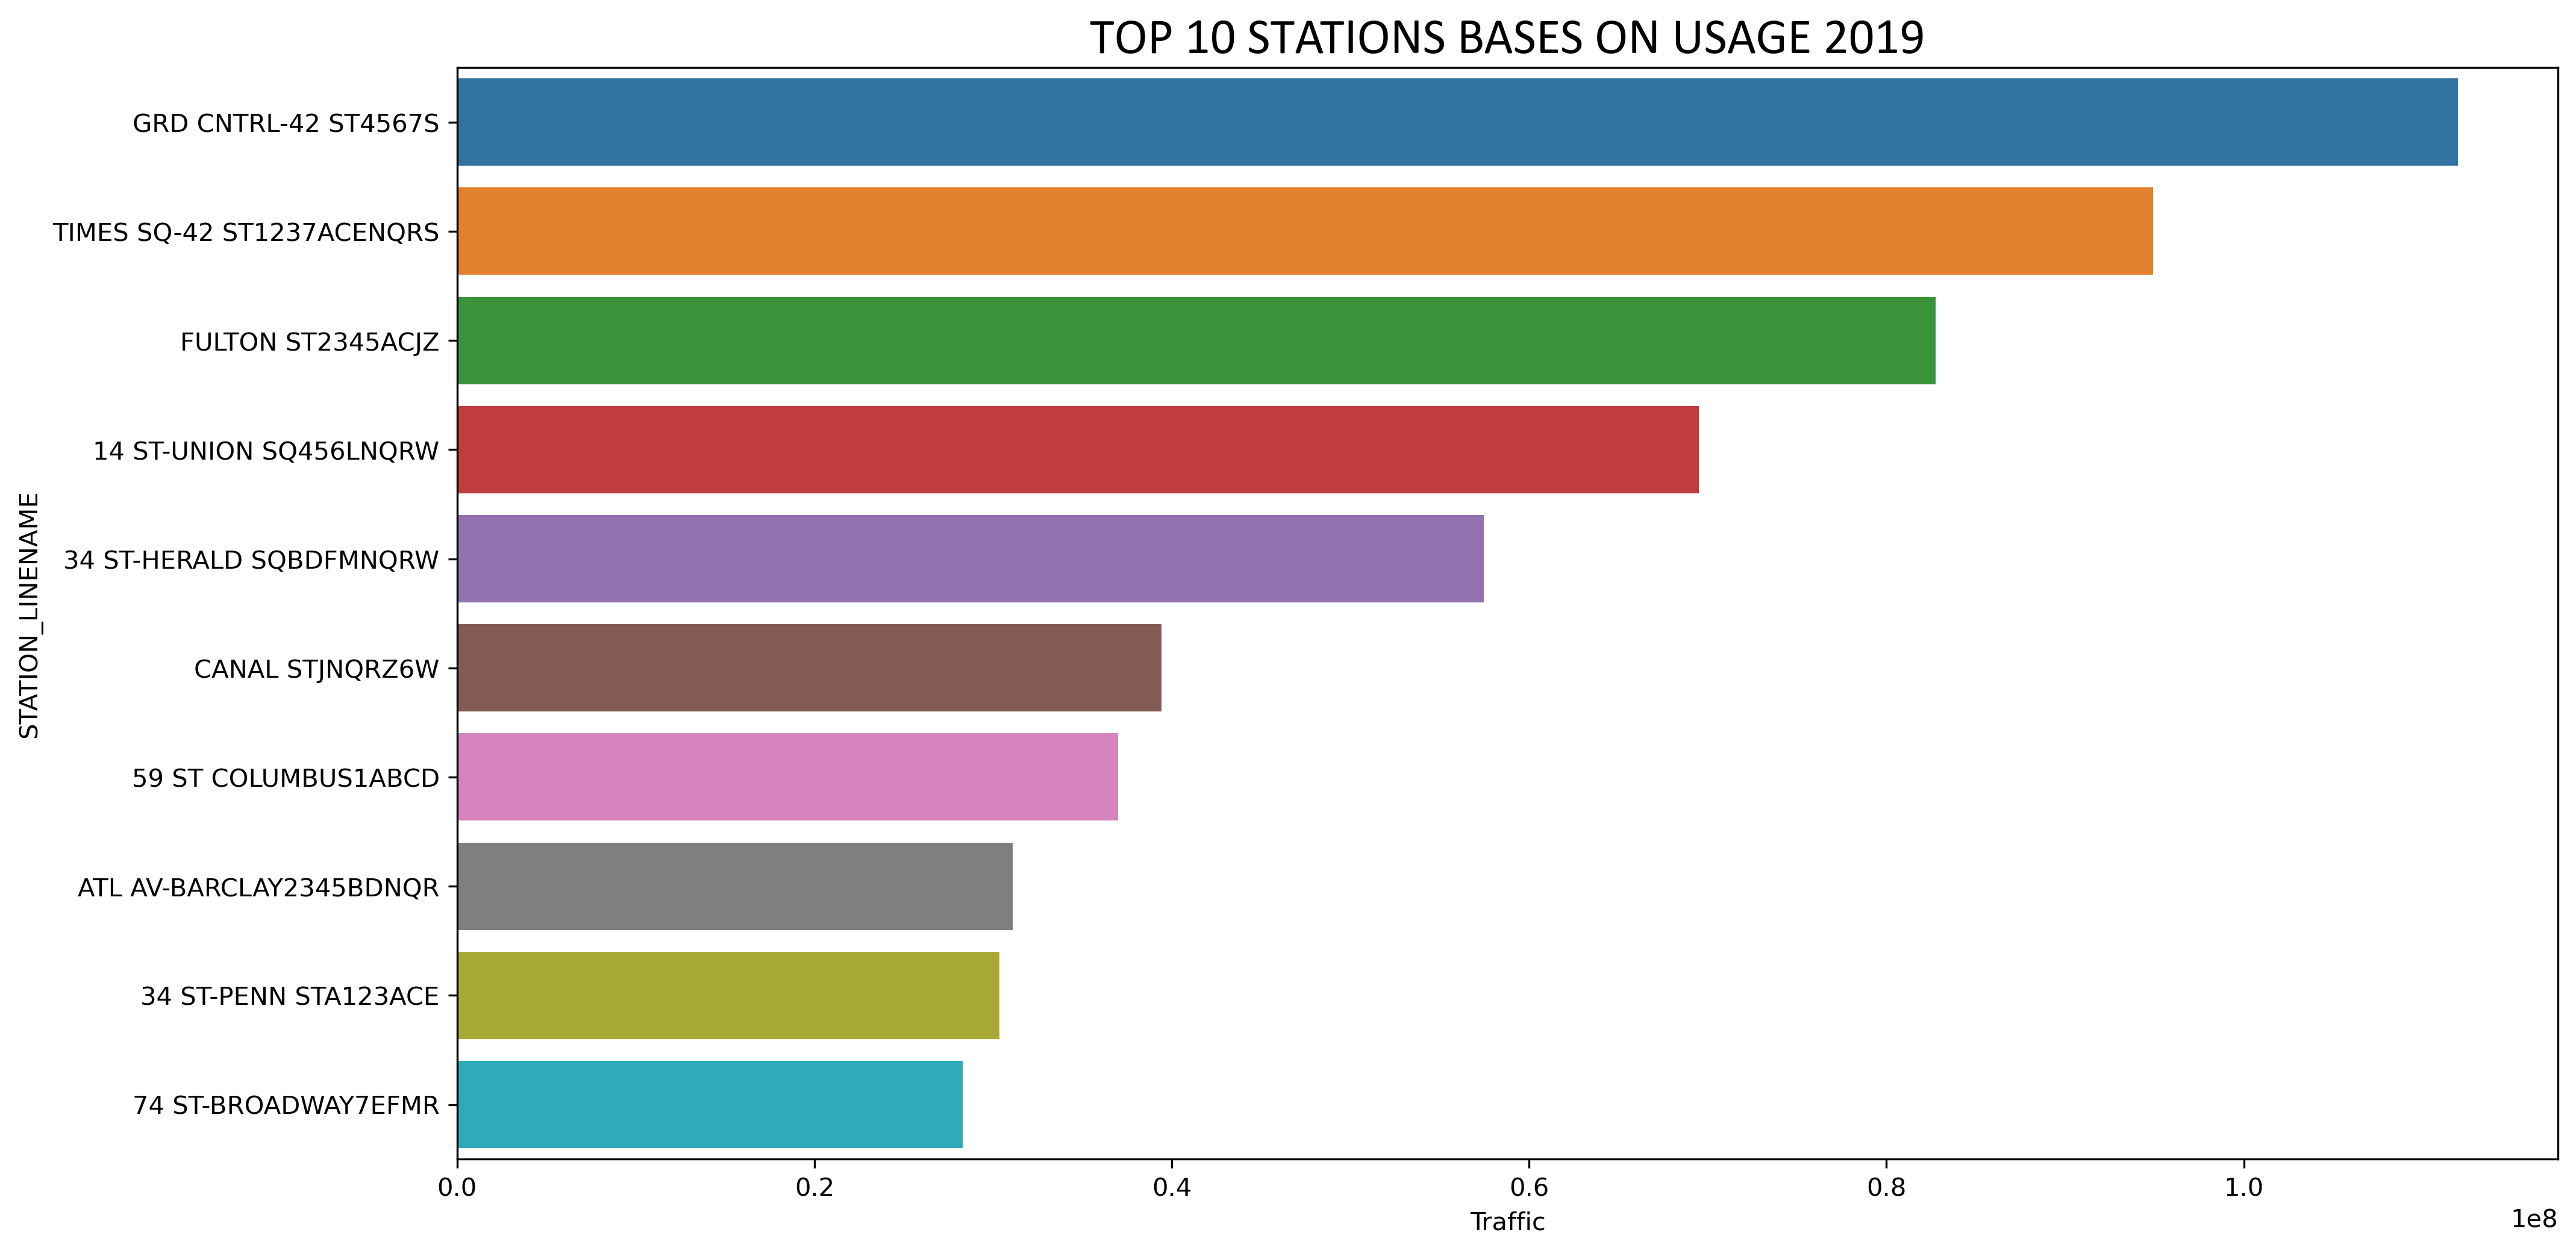

<Figure size 432x288 with 0 Axes>

In [172]:
plt.figure(figsize=(15,8), dpi=300)
plt.title('TOP 10 STATIONS BASES ON USAGE 2019',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.barplot(data = usage1019, y = usage1019['STATION_LINENAME'], x = usage1019['DAILY_ENTRIES'])
plt.xlabel('Traffic')
plt.show()
plt.savefig('TOP 10 STATIONS BASES ON USAGE 2019.jpg',  bbox_inches='tight')

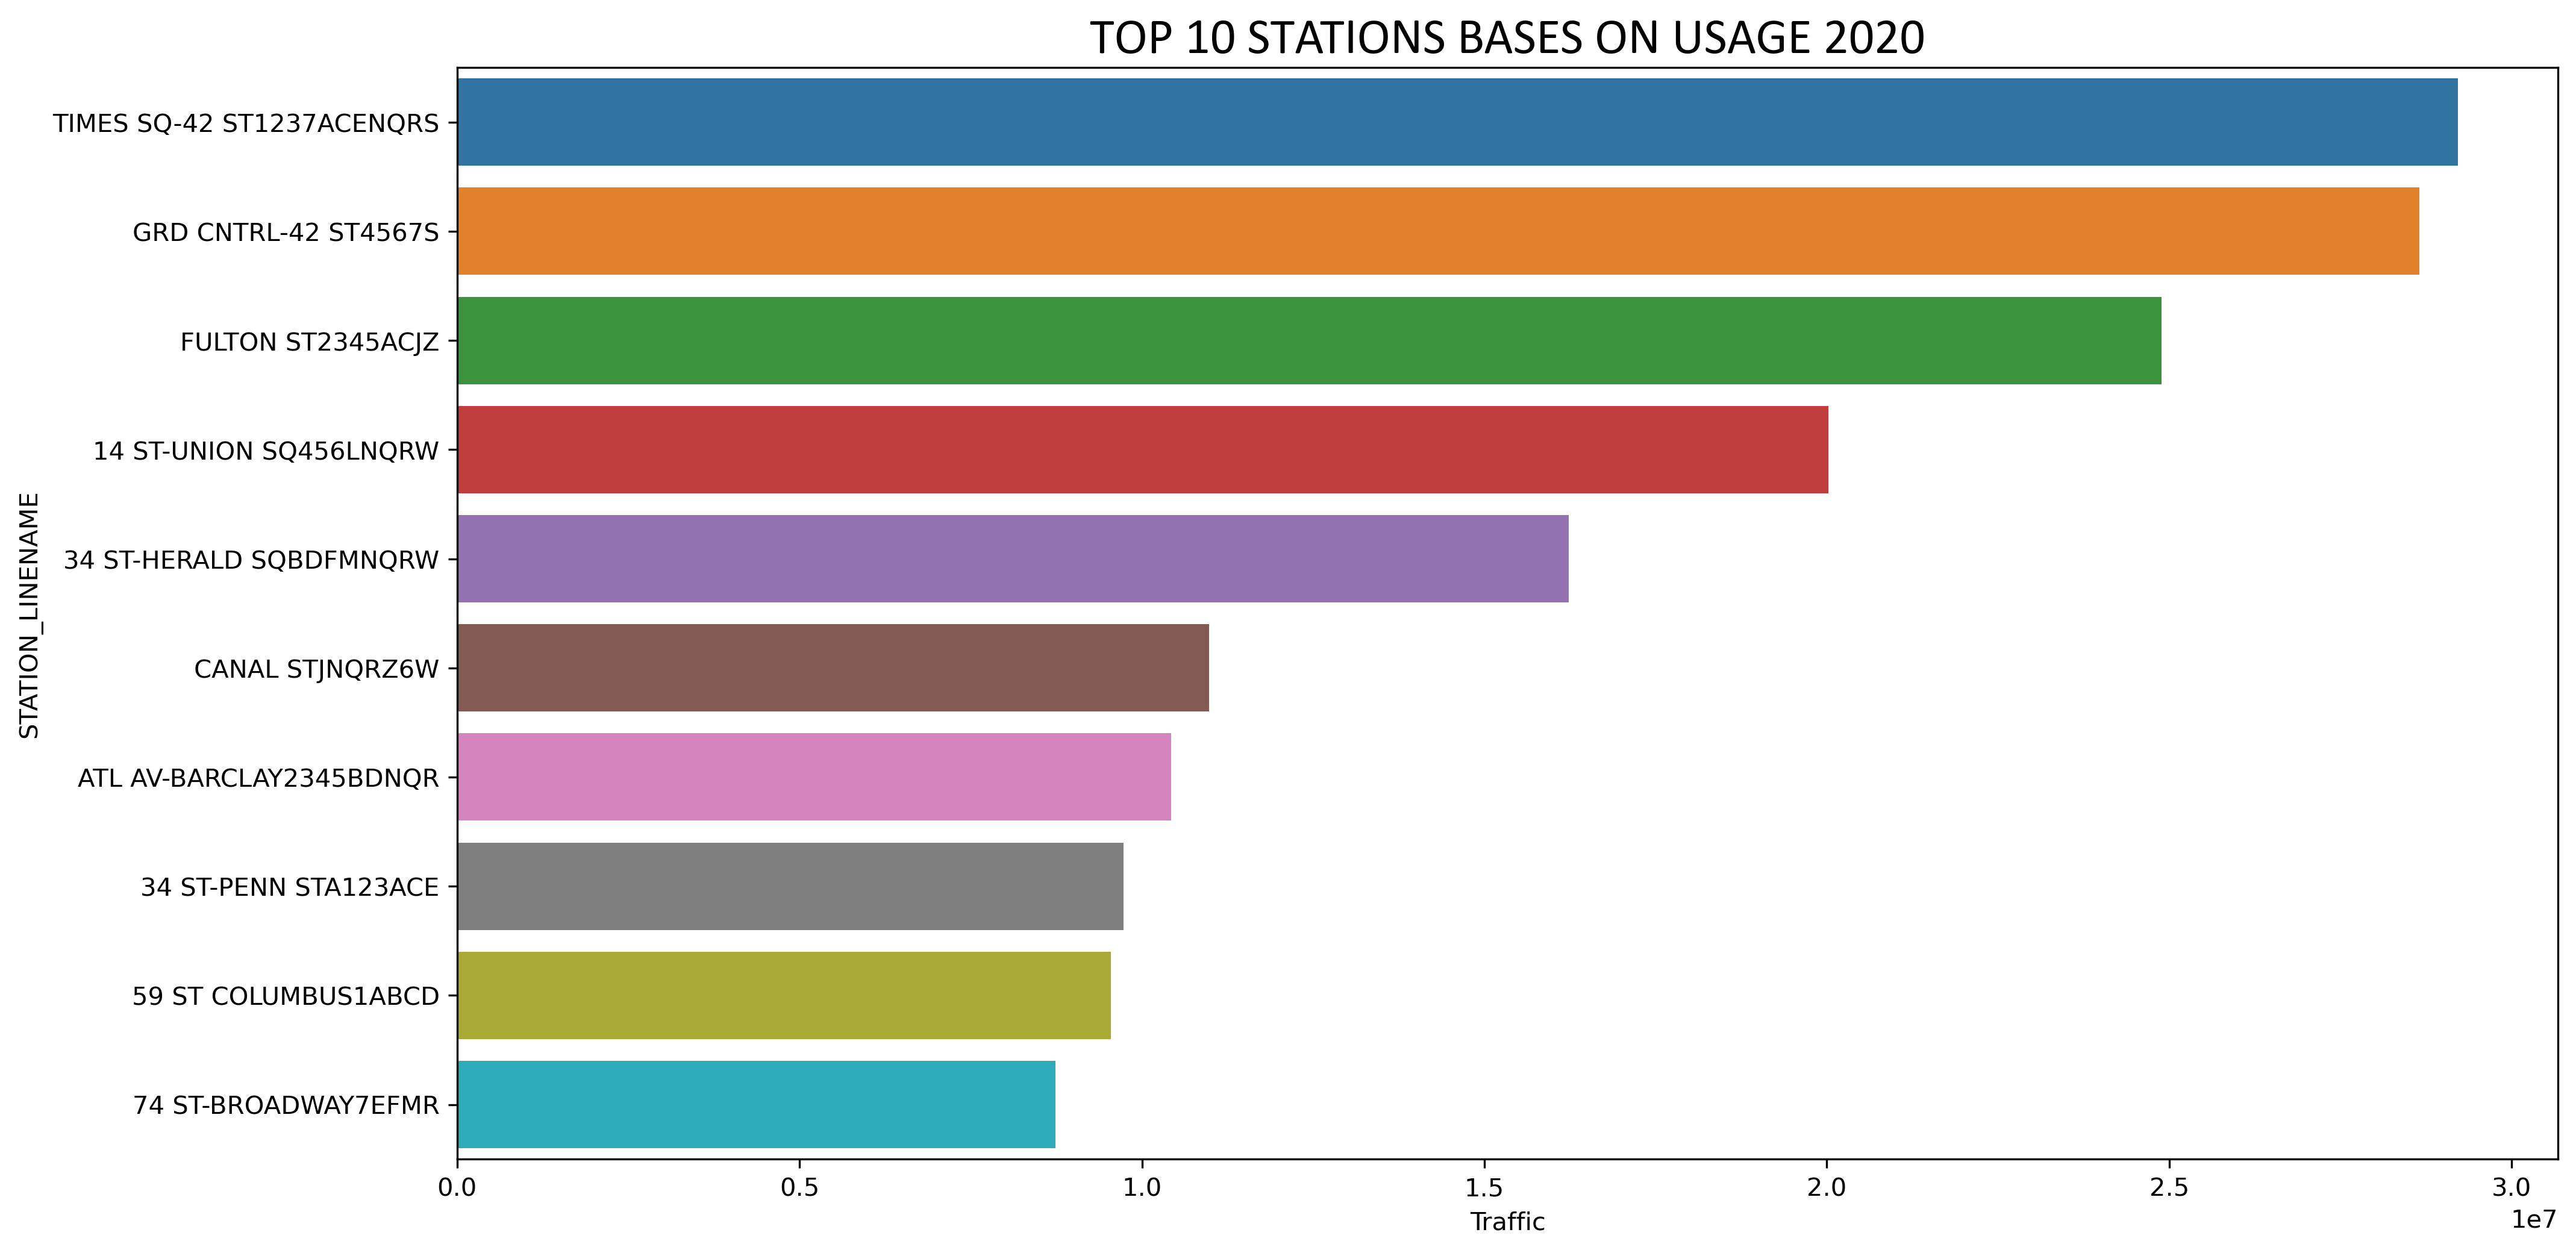

<Figure size 432x288 with 0 Axes>

In [173]:
plt.figure(figsize=(15,8), dpi=300)
plt.title('TOP 10 STATIONS BASES ON USAGE 2020',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.barplot(data = usage1020, y = usage1020['STATION_LINENAME'], x = usage1020['DAILY_ENTRIES'])
plt.xlabel('Traffic')
plt.show()
plt.savefig('TOP 10 STATIONS BASES ON USAGE 2020.jpg',  bbox_inches='tight')

In [136]:
x = usage1019['STATION_LINENAME'].astype('string')==usage1020['STATION_LINENAME'].astype('string')
x = pd.Series(x)
mostTraffic=usage1020[x]['STATION_LINENAME'].tolist()
mostTraffic

['FULTON ST2345ACJZ',
 '14 ST-UNION SQ456LNQRW',
 '34 ST-HERALD SQBDFMNQRW',
 'CANAL STJNQRZ6W',
 '74 ST-BROADWAY7EFMR']

(array([14.,  7.,  3.,  0.]),
 array([15, 30, 45, 60, 75]),
 <BarContainer object of 4 artists>)

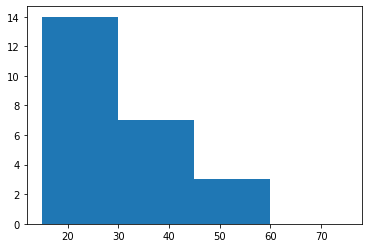

In [47]:
plt.hist(stations['arrests'],bins=[15,30,45,60,75])

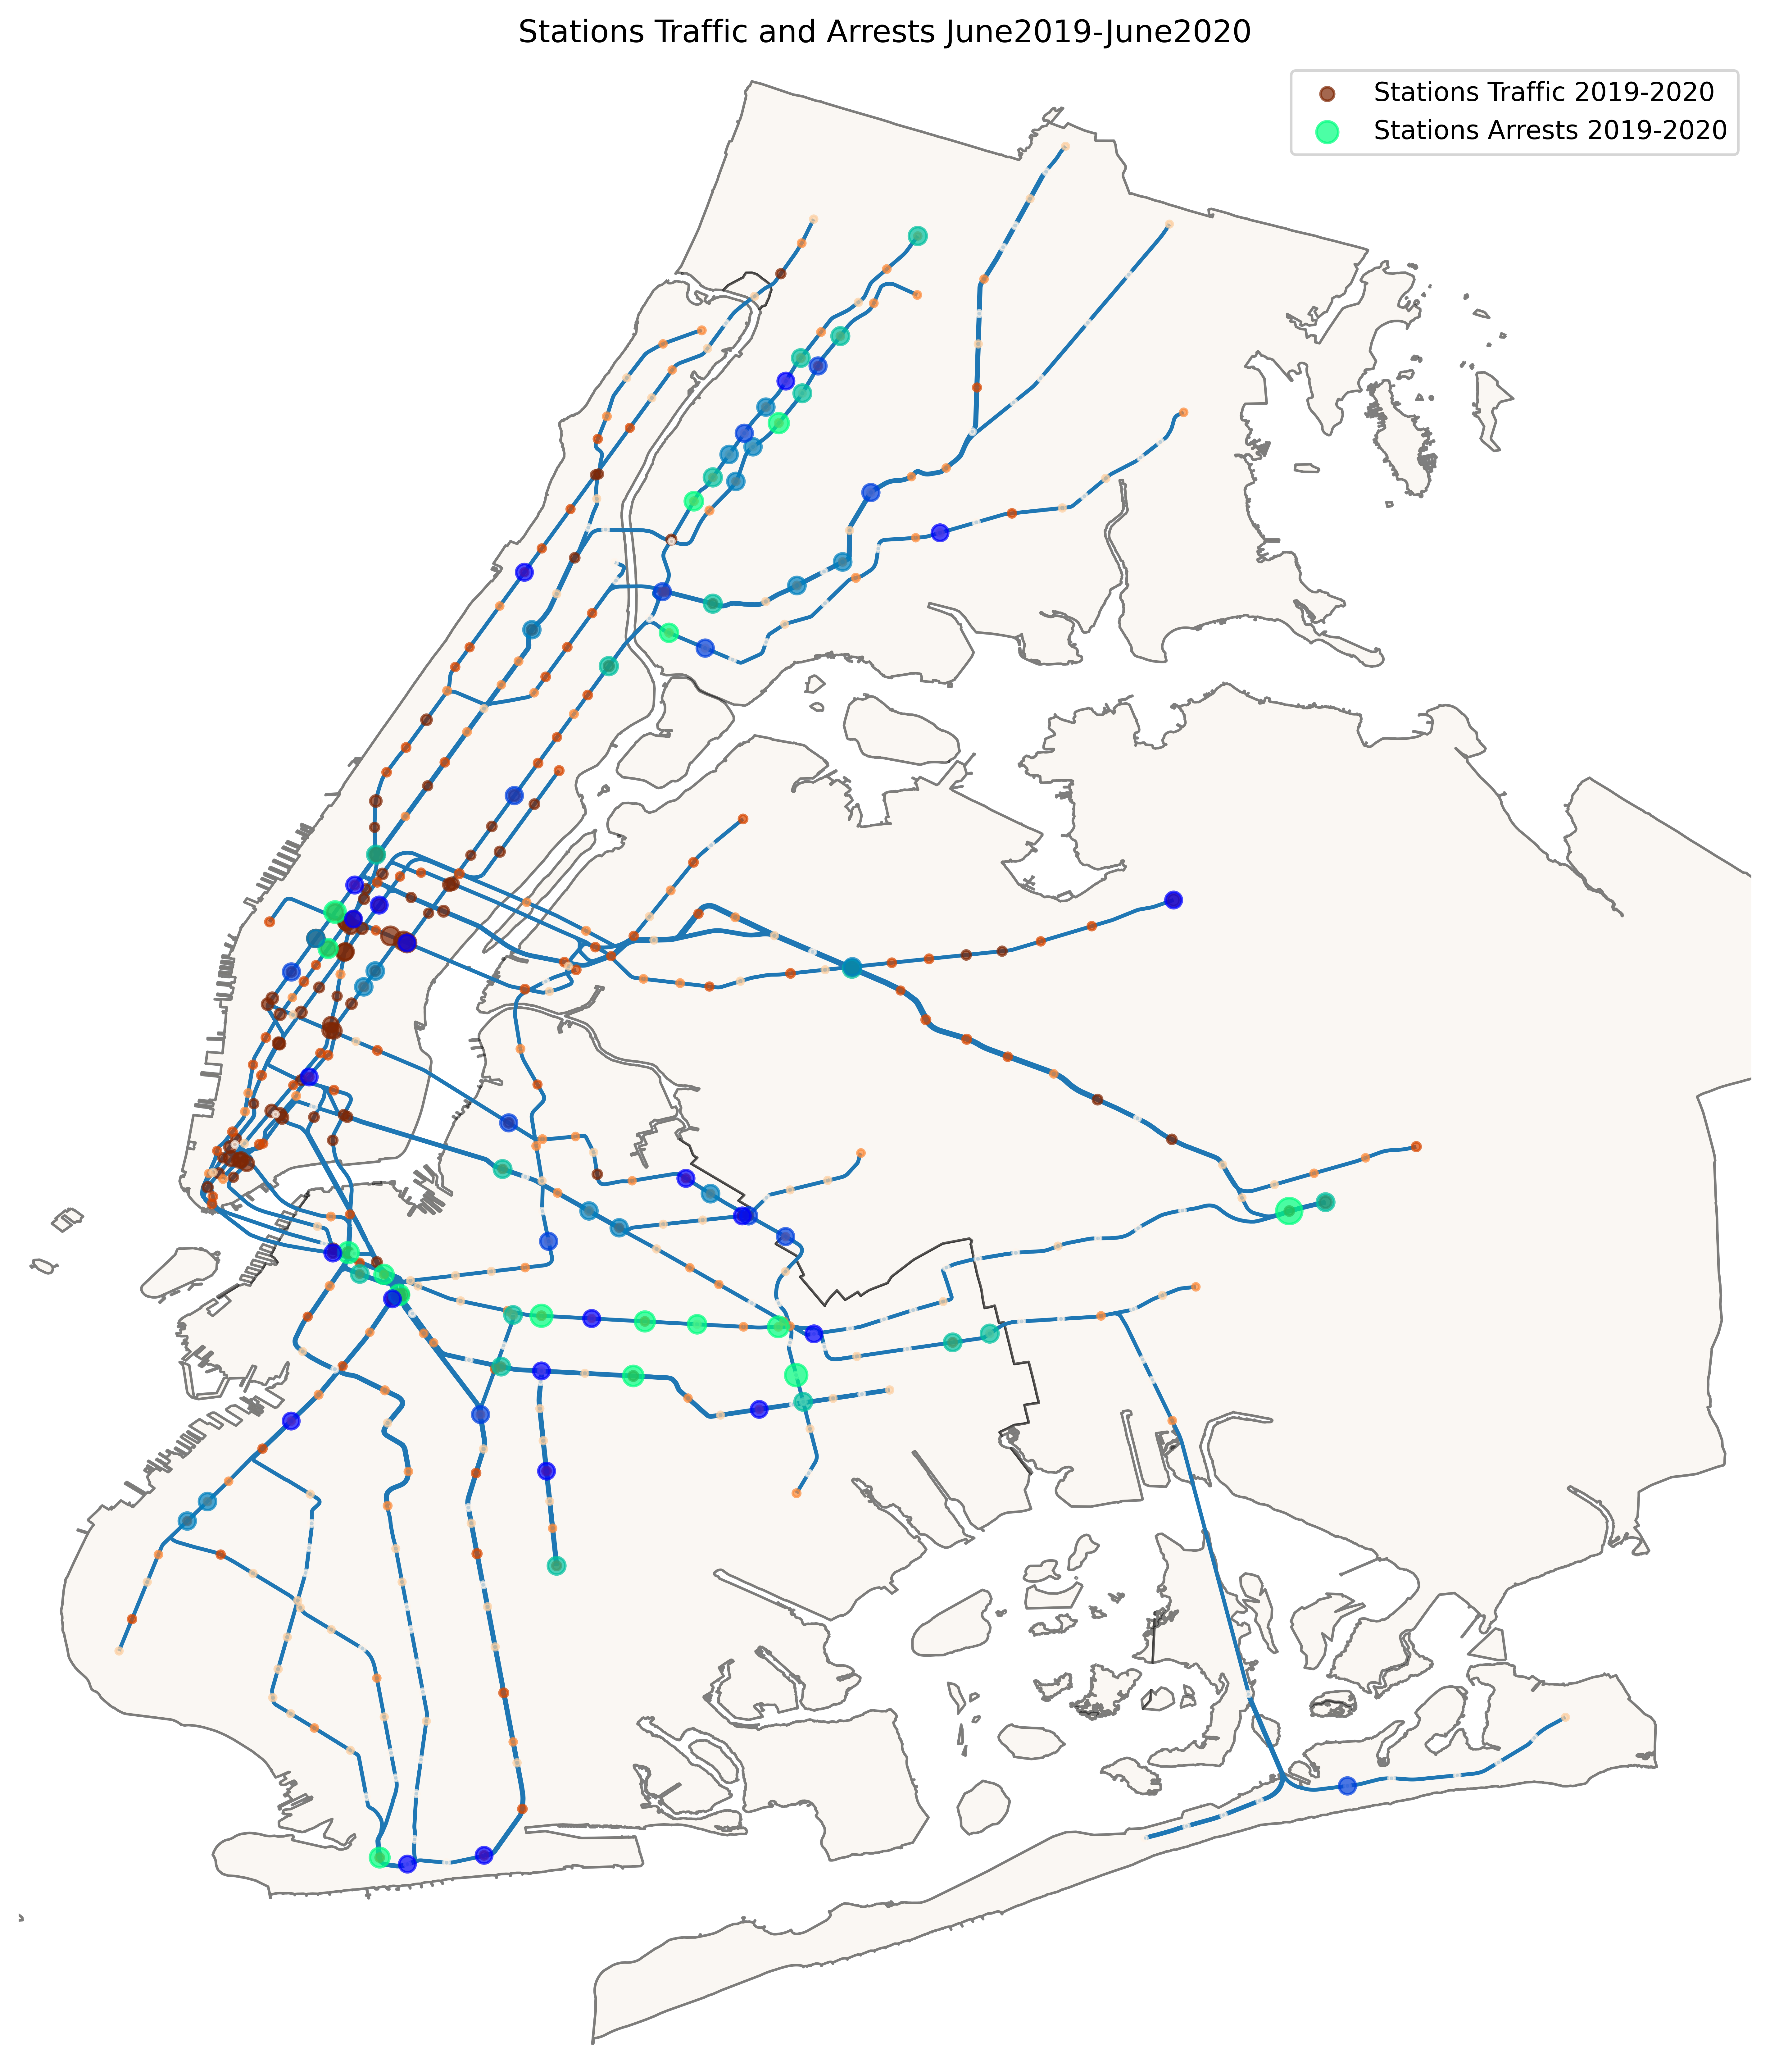

In [184]:
fig, ax = plt.subplots(figsize=(12,15), dpi=600)
ax.set_aspect('equal')

ax.axis('off')

borough_bound.plot(ax = ax, alpha=0.5, edgecolor='k',color='#F6F0E8')
subway_lines.plot(ax = ax, alpha=1 )


geoplot.pointplot(stations.fillna(0), ax=ax, scale='usage', limits=(5, 50), k=5,
               label='Stations Traffic 2019-2020', legend=True, legend_var='hue', cmap='Oranges',
                  legend_kwargs={'loc':'upper left'},
                scheme = None, hue='usage', zorder=10, alpha=0.7)

geoplot.pointplot(stations.query('arrests > 5').dropna(), ax=ax, scale='arrests', limits=(40, 100),
               label='Stations Arrests 2019-2020', legend=True, legend_var='hue', cmap='winter',
                  legend_kwargs={'loc':'lower right'},
                scheme = None, hue='arrests', zorder=10, alpha=0.7)

leg2 = ax.legend(loc='upper right')

ax.set_xlim((-74.05, -73.72))
ax.set_ylim((40.54, 40.92))
plt.title('Stations Traffic and Arrests June2019-June2020')
plt.savefig('Usage_per_station.png',  bbox_inches='tight')

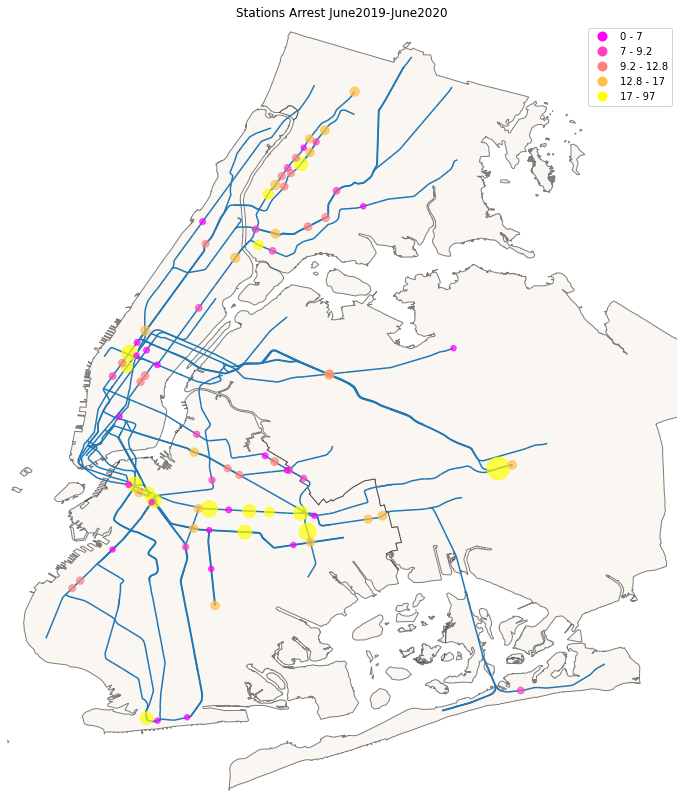

In [177]:
fig, ax = plt.subplots(figsize=(12,15))
ax.set_aspect('equal')

ax.axis('off') 

borough_bound.plot(ax = ax, alpha=0.5, edgecolor='k',color='#F6F0E8')
subway_lines.plot(ax = ax, alpha=1 )


geoplot.pointplot(stations.query('arrests>5').dropna(), ax=ax, scale='arrests', limits=(30, 500),
               label='Stations scaled by arrests', legend=True, legend_var='hue', cmap='spring',
                scheme = None, hue='arrests', zorder=10, alpha=0.7)

ax.set_xlim((-74.05, -73.72))
ax.set_ylim((40.54, 40.92))
plt.title('Stations Arrest June2019-June2020')
plt.savefig('Arrests_per_station.png',  bbox_inches='tight')